In [105]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

IMAGE_PATH = '../images/expt_7/hpf.bmp'

def readImage(imagePath, imageName):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Original ' + imageName)
    
    return grayscale


def filterImage(grayImage, imageFilter, filterName):

    # Filtering

    # take input from user
    # n -> filter size
    # filt -> filter kernel

    filt = imageFilter
    n = filt.shape[0]


    # constructing deviation from centre matrix
    # n -> filter size
    deviations = []
    for i in range(n):
        dev_row = []
        for j in range(n):
            elem = ( j - n//2, i - n//2)
            dev_row.append(elem)

        deviations.append(dev_row)


    # initialize result to store image
    result = np.zeros(grayImage.shape)



    # filtering logic using deviation mask
    for i in range(grayImage.shape[0]):
        for j in range(grayImage.shape[1]):
            filter_prod = 0

            for k in range(n):
                for m in range(n):

                    x_shift = deviations[k][m][0]
                    y_shift = deviations[k][m][1]

                    x_index = i + y_shift  
                    y_index = j + x_shift

                    if (x_index < 0 or x_index >= grayImage.shape[0] or y_index < 0 or y_index >= grayImage.shape[1]):
                        continue

                    t = grayImage[i + y_shift, j + x_shift]
                    filter_prod = filter_prod + ( filt[k][m] * t )

            result[i, j] =  filter_prod

    plt.imshow(result, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Filtered Image Using ' + filterName)

            

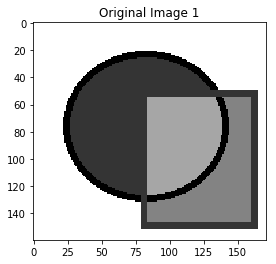

In [106]:
img1 = readImage(IMAGE_PATH, 'Image 1')

In [107]:
lpf = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]   
])

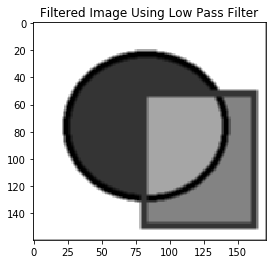

In [108]:
b = filterImage(img1, lpf, 'Low Pass Filter')

In [109]:
hpf = (1/9) * np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]   
])

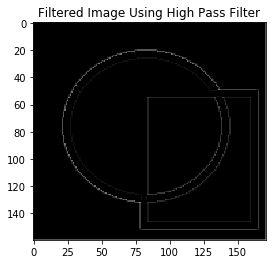

In [110]:
a = filterImage(img1, hpf, 'High Pass Filter')